<a href="https://colab.research.google.com/github/MissCoul/lncRNA_data/blob/main/HW1_Coulibaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('/Users/minatacoulibaly/lncRNA_5_Cancers.csv')

In [ ]:
#print the unique values in Class culumn
print (data.groupby("Class").groups.keys())

dict_keys(['KIRC', 'LUAD', 'LUSC', 'PRAD', 'THCA'])


In [ ]:
#1st step drop Ensembl_ID culumn
df=data.drop(columns='Ensembl_ID')
print(df.head(5))

   ENSG00000005206.15  ENSG00000083622.8  ENSG00000088970.14  \
0            3.390813                0.0            2.918265   
1            3.144547                0.0            1.961410   
2            2.484817                0.0            2.896470   
3            2.789058                0.0            2.439171   
4            3.258763                0.0            1.941660   

   ENSG00000099869.7  ENSG00000100181.20  ENSG00000104691.13  \
0           0.014832            0.341984            2.194036   
1           0.047186            1.677598            2.605298   
2           0.000000            0.087972            3.176764   
3           0.022316            0.502293            2.679842   
4           0.050283            0.098625            2.841588   

   ENSG00000115934.11  ENSG00000117242.7  ENSG00000118412.11  \
0                 0.0           1.569750            1.159419   
1                 0.0           1.180583            1.127571   
2                 0.0           1.6905

In [ ]:
# Get all the features columns except the class
features = list(df.columns)[:-2]
classes = df['Class']

# Get the features data
df = df[features]

In [ ]:
#assign class values to results
results['Class']=classes

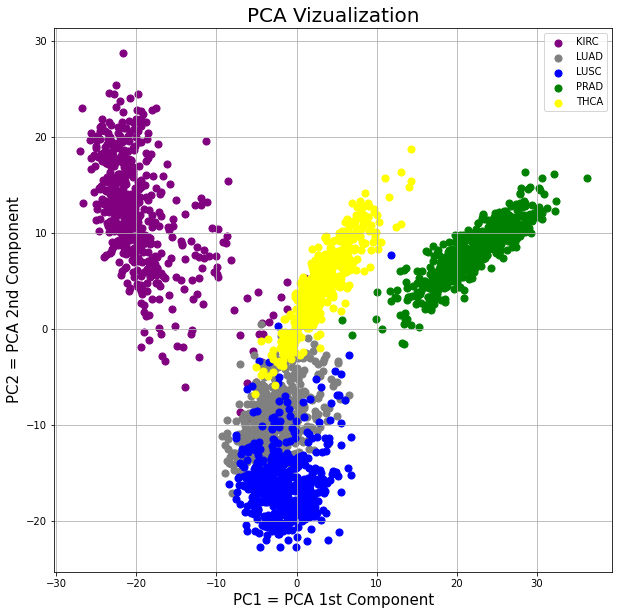

In [ ]:
#step 4 visualizing the pca
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1 = PCA 1st Component', fontsize = 15)
ax.set_ylabel('PC2 = PCA 2nd Component', fontsize = 15)

ax.set_title('PCA Vizualization', fontsize = 20)

targets = ['KIRC', 'LUAD', 'LUSC', 'PRAD', 'THCA']

colors = ['purple', 'gray', 'blue', 'green', 'yellow' ]

for target, color in zip(targets,colors):
    indicesToKeep = results['Class'] == target
    ax.scatter(results.loc[indicesToKeep, 'pca1']
               , results.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

<AxesSubplot:xlabel='Class', ylabel='pca1'>

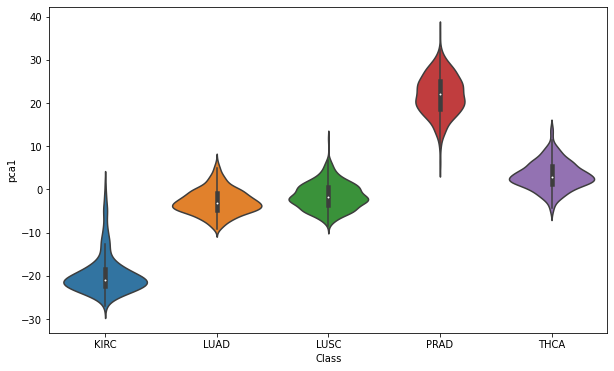

In [ ]:
#Violin plot for PCA 1
plt.figure(figsize=(10,6))
sns.violinplot(data=results, x="Class", y="pca1")

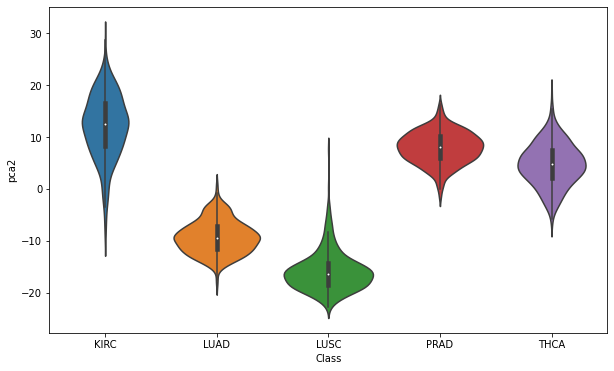

In [ ]:
#Violin plot for PCA 2
plt.figure(figsize=(10,6))
sns.violinplot(  data=results, x="Class", y="pca2")
plt.title=("Violin plot for PCA2")
plt.show()

In [ ]:
#drop Ensembl_ID culumn and assign the new DataFrame to dataframe
dataframe=data.drop(columns='Ensembl_ID')

In [ ]:
# Get all the features columns except the class
features = list(df.columns)[:-2]
classes = dataframe['Class']

# Get the features data
dataframe = dataframe[features]

/Users/minatacoulibaly/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/minatacoulibaly/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


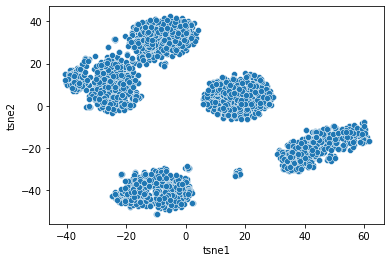

<Figure size 432x288 with 0 Axes>

In [ ]:
# Run TSNE on the data and reduce the dimensions in tsne_num_components dimensions

tsne_num_components = 2

reduced_data = TSNE(n_components=tsne_num_components).fit_transform(dataframe)
resultstsne = pd.DataFrame(reduced_data,columns=['tsne1','tsne2'])

sns.scatterplot(x="tsne1", y="tsne2", data=resultstsne)

plt.show()
#save the figure
plt.savefig('plot.png')

In [ ]:
#assign Class values to resultstsne
resultstsne['Class']=classes

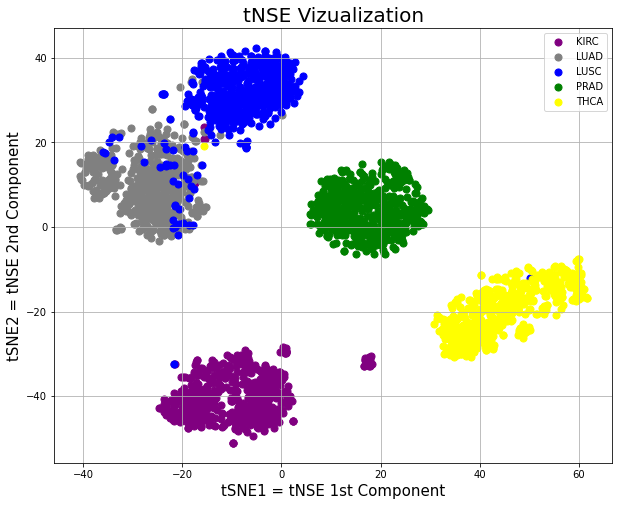

In [ ]:
#step 4 visualizing the pca
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('tSNE1 = tNSE 1st Component', fontsize = 15)
ax.set_ylabel('tSNE2 = tNSE 2nd Component', fontsize = 15)

ax.set_title('tNSE Vizualization', fontsize = 20)

targets = ['KIRC', 'LUAD', 'LUSC', 'PRAD', 'THCA']

colors = ['purple', 'gray', 'blue', 'green', 'yellow' ]

for target, color in zip(targets,colors):
    indicesToKeep = resultstsne['Class'] == target
    ax.scatter(resultstsne.loc[indicesToKeep, 'tsne1']
               , resultstsne.loc[indicesToKeep, 'tsne2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()


<AxesSubplot:xlabel='Class', ylabel='tsne1'>

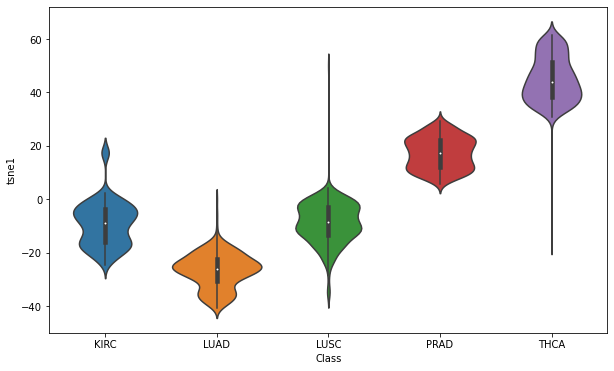

In [ ]:
#tsne 1 violin plot
plt.figure(figsize=(10,6))
sns.violinplot(data=resultstsne, x="Class", y="tsne1")

<AxesSubplot:xlabel='Class', ylabel='tsne2'>

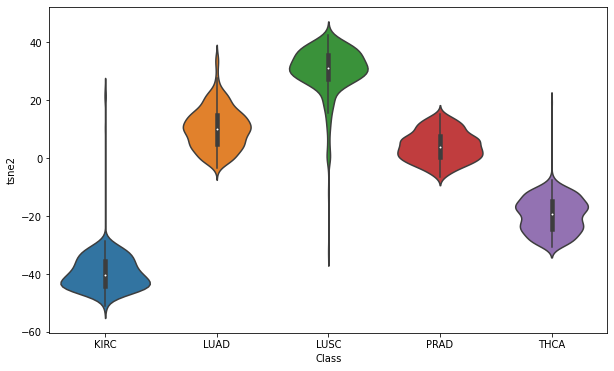

In [ ]:
#tsne 2 violin plot
plt.figure(figsize=(10,6))
sns.violinplot(data=resultstsne, x="Class", y="tsne2")